#Intro

This is the fourth practical homework for the ML seminar.  We will work on the 2D dataset from the previous homework.

# Tasks

The tasks are as follows. 

1. Tune the hyperparameter k for kNN as in the ex. 21/page 403, i.e. create a similar plot and choose k.

If so far you may have found the distinction between underfitting and overfitting useless in practice, i.e. if there is a problem with a model, we pick a model with a greater validation accuracy (we do not care if there is overfitting or underfitting), now we try to give you another perspective. Let's say that when starting an ML experiment we do not choose a list of say 15 models, but we start with a model and we try to get the very best of this model. ONLY AFTER THAT we go to the next algorithm and so on. We find this procedure more interesting.

2. Let's say we start the ML experiment with a decision tree. Apply `sklearn.tree.DecisionTreeClassifier(criterion="entropy")` and identify if you have overfitting or underfitting. Check the list at https://docs.google.com/document/d/1WW2zvWs2Jnrx3kHvU1-k7bNo1VlIPtKvxPowbORnyGc/edit?usp=sharing . Choose one interesting solution (for your problem) from there and apply it. For example use bagging (`sklearn.ensemble.BaggingClassifier`)/boosting (`sklearn.ensemble.AdaBoostClassifier`) starting from the `sklearn.tree.DecisionTreeClassifier(criterion="entropy")` estimator. Has your problem been mitigated?

3. Now let's apply `sklearn.naive_bayes.GaussianNB()` and identify if you have overfitting or underfitting. Check the list at https://docs.google.com/document/d/1WW2zvWs2Jnrx3kHvU1-k7bNo1VlIPtKvxPowbORnyGc/edit?usp=sharing . Choose one interesting option (for your problem) from there and apply it. For example use bagging (`sklearn.ensemble.BaggingClassifier`)/boosting (`sklearn.ensemble.AdaBoostClassifier`) starting from the `sklearn.naive_bayes.GaussianNB()` estimator. Has your problem been mitigated?

## Get dataset

In [2]:
!wget https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.tree
import sklearn.naive_bayes
from planar_utils_modified import plot_decision_boundary, load_planar_dataset, load_extra_datasets

%matplotlib inline

--2020-12-09 21:35:02--  https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2106 (2.1K) [text/plain]
Saving to: ‘planar_utils_modified.py’

planar_utils_modifi 100%[===================>]   2.06K  --.-KB/s    in 0s      

2020-12-09 21:35:02 (38.9 MB/s) - ‘planar_utils_modified.py’ saved [2106/2106]



In [3]:
X, y = load_planar_dataset()

Visualize the data

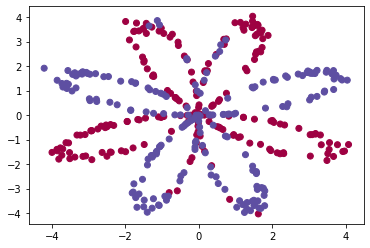

In [4]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Split the dataset in (train, validation) using the following percentages: 80%, 20%.

In [5]:
import sklearn
import sklearn.model_selection
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2, stratify=y)

Visualize X_train, X_val

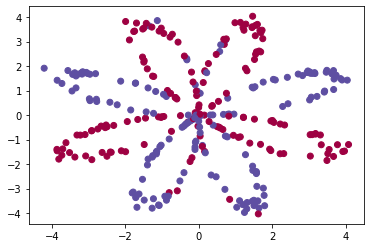

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)

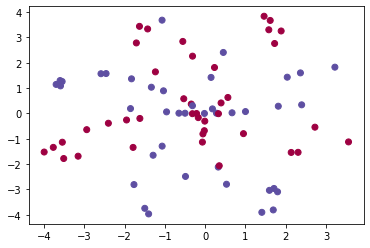

In [7]:
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.Spectral)

# Task 1 - solution

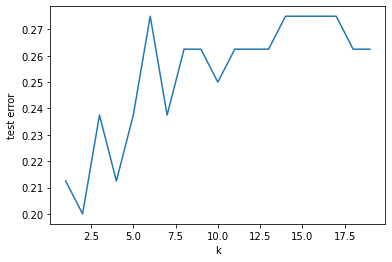

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn_best = None
errs = []

for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

  err = 1.0 - knn.score(X_val, y_val)
  errs.append(err)
 
plt.plot([k for k in range(1, 20)], errs)
plt.ylabel("test error")
plt.xlabel("k")
plt.show()

# according to the graph, the best value for k is 2
k_best = 2
knn_best = KNeighborsClassifier(n_neighbors=k_best).fit(X_train, y_train)

# Task 2 - solution

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = sklearn.tree.DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
acc = dt.score(X_train, y_train)
print(acc) # there is overfitting

estimator = sklearn.tree.DecisionTreeClassifier(criterion="entropy")
bc = sklearn.ensemble.BaggingClassifier(estimator).fit(X_train, y_train)
acc = bc.score(X_train, y_train)
print(acc)

# the problem has been slightly mitigated

1.0
0.98125


# Task 3 - solution

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = sklearn.naive_bayes.GaussianNB().fit(X_train, y_train)
acc = gnb.score(X_train, y_train)
print(acc) # there is underfitting

estimator = sklearn.naive_bayes.GaussianNB()
ab = sklearn.ensemble.AdaBoostClassifier(estimator).fit(X_train, y_train)
acc = ab.score(X_train, y_train)
print(acc)

# the problem has been slightly mitigated

0.478125
0.509375
